<a href="https://colab.research.google.com/github/codefinn9988/Ml_learn/blob/main/classification_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier #to build a classification tree
from sklearn.tree import plot_tree #to draw classification tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score # for cross validaton
from sklearn.metrics import confusion_matrix # to create confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay # to draw confusion matrix


In [ ]:
#import the data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',header=None)


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
df.columns = ['age',
             'sex',
             'cp',
             'restbp',
             'chol',
             'fbs',
             'restecg',
             'thalach',
             'exang',
             'oldpeak',
             'slope',
             'ca',
             'thal',
             'hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
# Identifying missing data
df.dtypes

,0
age,float64
sex,float64
cp,float64
restbp,float64
chol,float64
fbs,float64
restecg,float64
thalach,float64
exang,float64
oldpeak,float64


In [ ]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [ ]:
df['thal'].unique()


array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [ ]:
#deling with missing data
len(df.loc[(df['ca']=='?') | (df['thal'] =='?')])

6

In [ ]:
df.loc[(df['ca']=='?') | (df['thal'] =='?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [ ]:
len(df)

303

In [ ]:
df_no_missing = df.loc[(df['ca']!='?') & (df['thal'] !='?')]

In [ ]:
len(df_no_missing)

297

In [ ]:
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [ ]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [ ]:
#format data 1
X = df_no_missing.drop('hd',axis =1).copy()
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [ ]:
y = df_no_missing['hd'].copy()
y.head()

,hd
0,0
1,2
2,1
3,0
4,0


In [ ]:
# format the data part 2 : one hot-encoding
# 1. columnTransformer() from scikit learn(use in production)
# 2. get_dummies() from pandas
X.dtypes

,0
age,float64
sex,float64
cp,float64
restbp,float64
chol,float64
fbs,float64
restecg,float64
thalach,float64
exang,float64
oldpeak,float64


In [ ]:
X['cp'].unique()

array([1., 4., 3., 2.])

In [ ]:
pd.get_dummies(X,columns=['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,True,False,False,False
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,False,False,False,True
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,False,False,True,False
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,False,True,False,False


In [ ]:
X_encoded  = pd.get_dummies(X,columns =['cp',
                                        'restecg',
                                        'slope',
                                        'thal'])
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,True,...,False,False,False,True,False,False,True,False,True,False
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,False,...,True,False,False,True,False,True,False,True,False,False
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,False,...,True,False,False,True,False,True,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,False,...,False,True,False,False,False,False,True,True,False,False
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,False,...,False,False,False,True,True,False,False,True,False,False


In [ ]:
y.unique()

array([0, 2, 1, 3, 4])

In [ ]:
y_not_zero_index = y>0 # get the index for each non-zero value in y
y[y_not_zero_index] = 1
y.unique()

array([0, 1])

In [ ]:
#build the preliminary classification tree

In [ ]:
#split the data into training  and testing sets
X_train, X_test , y_train,y_test = train_test_split(X_encoded,y,random_state = 42 )

#create a decision tree and fit into the traning data
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train,y_train)

[Text(0.5732758620689655, 0.9583333333333334, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No HD'),
 Text(0.33189655172413796, 0.875, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No HD'),
 Text(0.4525862068965517, 0.9166666666666667, 'True  '),
 Text(0.2025862068965517, 0.7916666666666666, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80.0, 13.0]\nclass = No HD'),
 Text(0.14655172413793102, 0.7083333333333334, 'age <= 58.5\ngini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No HD'),
 Text(0.08620689655172414, 0.625, 'chol <= 311.5\ngini = 0.061\nsamples = 63\nvalue = [61, 2]\nclass = No HD'),
 Text(0.05172413793103448, 0.5416666666666666, 'restbp <= 109.0\ngini = 0.033\nsamples = 60\nvalue = [59, 1]\nclass = No HD'),
 Text(0.034482758620689655, 0.4583333333333333, 'sex <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = No HD'),
 Text(0.017241379310344827, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = No HD'

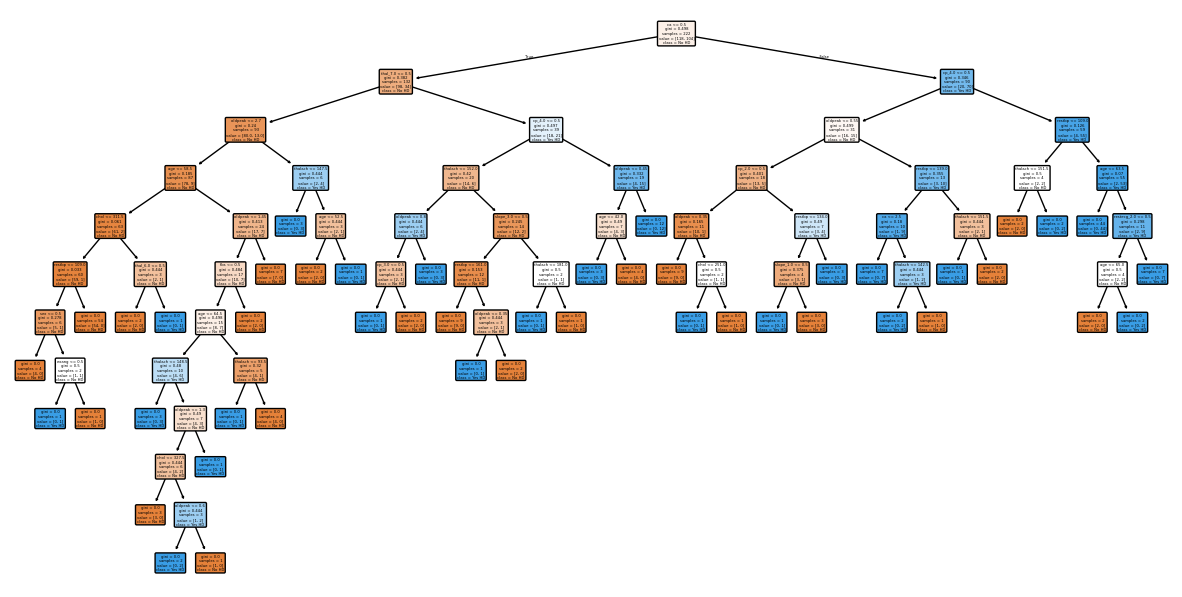

In [ ]:
plt.figure(figsize =(15,7.5))
plot_tree(clf_dt,
          filled=True,
          rounded=True,
          class_names =["No HD", "Yes HD"],
          feature_names = X_encoded.columns)

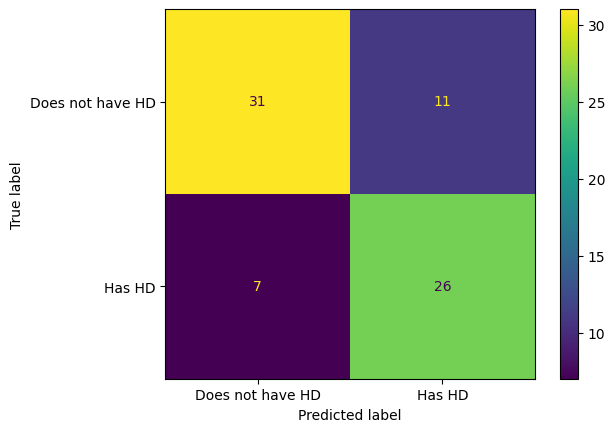

In [ ]:
## plot_confusion_matrix() will run the test data down the tree and draw
y_pred = clf_dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Does not have HD", "Has HD"])
disp.plot()


In [ ]:
# cost complexity pruning part 1: visualize alpha

In [ ]:
path = clf_dt.cost_complexity_pruning_path(X_train,y_train) #determine the values for alpha
ccp_alphas = path.ccp_alphas # extract different values  for alpha
ccp_alphas
ccp_alphas =ccp_alphas[:-1] #exclude the maximum values for alpha
clf_dts = [] #create an array that we  will put decision tree into

#now create one decision tree per value for alpha and store in the array
for ccp_alpha in ccp_alphas:
  clf_dt = DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
  clf_dt.fit(X_train,y_train)
  clf_dts.append(clf_dt)

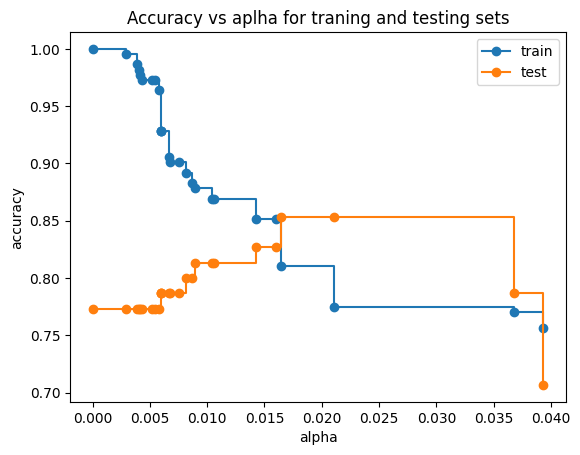

In [ ]:
train_scores = [clf_dt.score(X_train,y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test,y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs aplha for traning and testing sets")
ax.plot(ccp_alphas,train_scores,marker ="o",label="train",drawstyle="steps-post")
ax.plot(ccp_alphas,test_scores,marker ="o",label="test",drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
#cost complexity prunning part 2 : Cross validation for finding the best alpha


<Axes: xlabel='tree'>

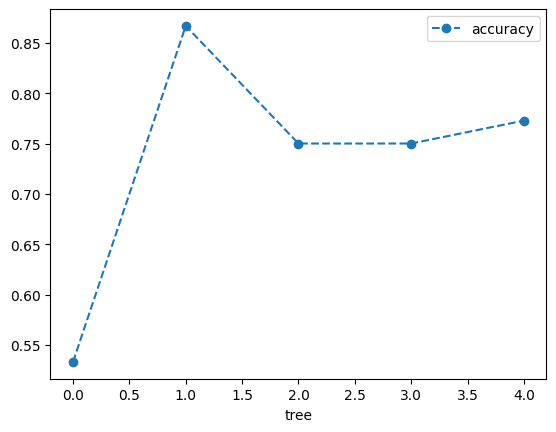

In [ ]:
clf_dt = DecisionTreeClassifier(random_state=42,ccp_alpha=0.016) #create a tree with ccp_alpha =0.016

# 5-fold cross validation
scores =cross_val_score(clf_dt,X_train,y_train,cv =5)
df = pd.DataFrame(data={'tree':range(5),'accuracy':scores})
df.plot(x="tree",y="accuracy",marker='o',linestyle="--")

<Axes: xlabel='alpha'>

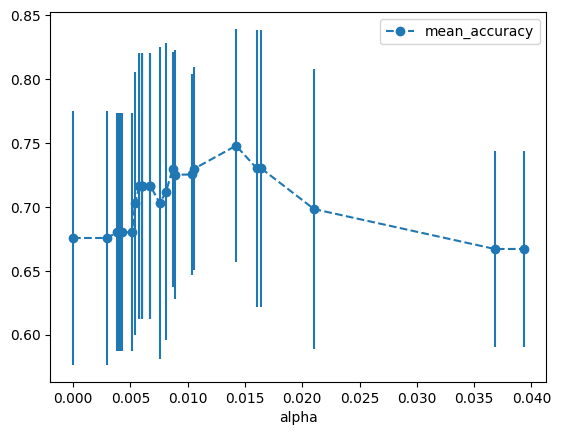

In [ ]:
# create an array to store the results of each fold during cross validation
alpha_loop_values =[]
# we will store mean and standard deviation  of the scores(the accuracy) for each call
for ccp_alpha in ccp_alphas:
  clf_dt= DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
  scores = cross_val_score(clf_dt,X_train,y_train,cv=5)
  alpha_loop_values.append([ccp_alpha,np.mean(scores),np.std(scores)])

alpha_results =pd.DataFrame(alpha_loop_values,
                            columns=['alpha','mean_accuracy','std'])

alpha_results.plot(x="alpha",
                   y="mean_accuracy",
                   yerr="std",
                   marker='o',
                   linestyle='--')



In [ ]:
alpha_results[(alpha_results['alpha']>0.014) & (alpha_results['alpha'] <0.015)]


,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


In [ ]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha']>0.014) & (alpha_results['alpha'] <0.015)]['alpha']
ideal_ccp_alpha

,alpha
20,0.014225


In [ ]:
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

/tmp/ipython-input-160-4011548369.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ideal_ccp_alpha = float(ideal_ccp_alpha)


0.014224751066856332

In [ ]:
#building , evaluating , drawing and interpreting the final classification tree

clf_dt_pruned = DecisionTreeClassifier(random_state=42,ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train,y_train)


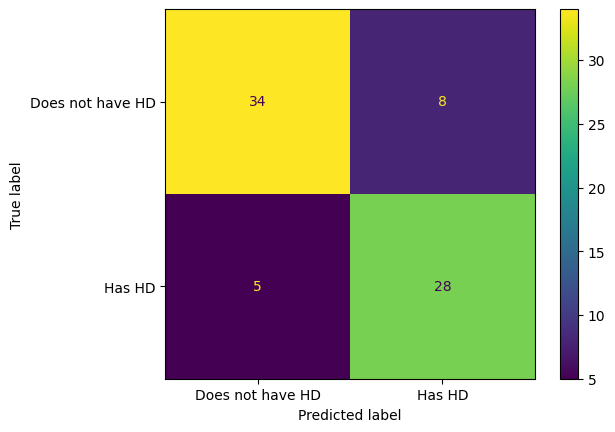

In [ ]:
y_pred = clf_dt_pruned.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Does not have HD", "Has HD"])
disp.plot()

[Text(0.5769230769230769, 0.875, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No HD'),
 Text(0.3076923076923077, 0.625, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No HD'),
 Text(0.4423076923076923, 0.75, 'True  '),
 Text(0.15384615384615385, 0.375, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80.0, 13.0]\nclass = No HD'),
 Text(0.07692307692307693, 0.125, 'gini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No HD'),
 Text(0.23076923076923078, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = Yes HD'),
 Text(0.46153846153846156, 0.375, 'cp_4.0 <= 0.5\ngini = 0.497\nsamples = 39\nvalue = [18, 21]\nclass = Yes HD'),
 Text(0.38461538461538464, 0.125, 'gini = 0.42\nsamples = 20\nvalue = [14, 6]\nclass = No HD'),
 Text(0.5384615384615384, 0.125, 'gini = 0.332\nsamples = 19\nvalue = [4, 15]\nclass = Yes HD'),
 Text(0.8461538461538461, 0.625, 'cp_4.0 <= 0.5\ngini = 0.346\nsamples = 90\nvalue = [20, 70]\nclass = Yes HD'),
 

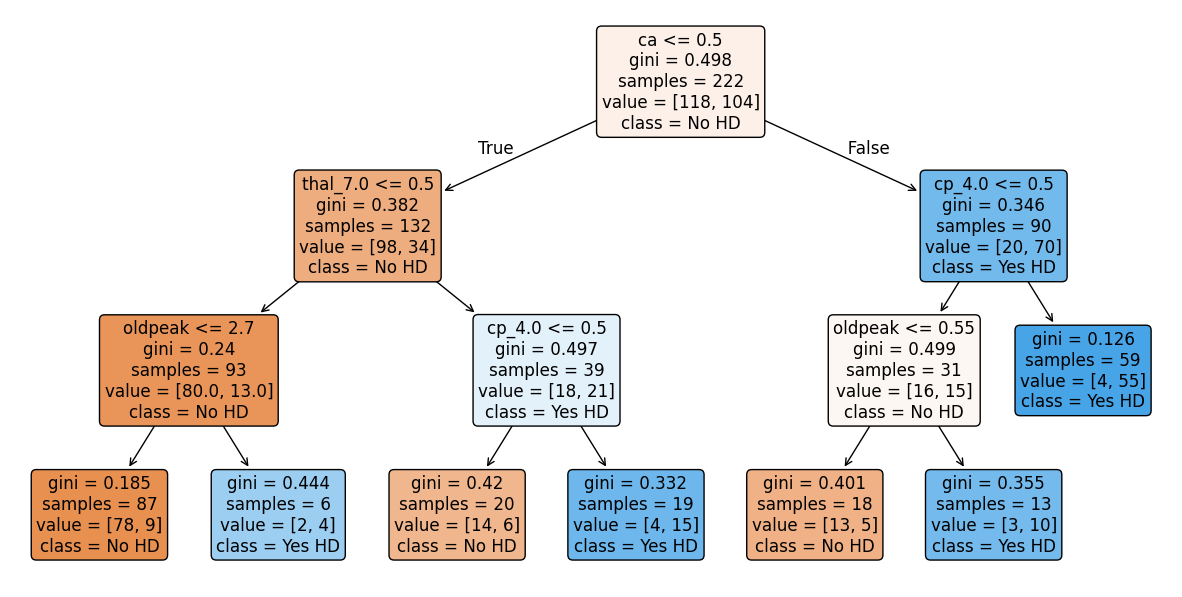

In [ ]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,
          filled=True,
          rounded =True,
          class_names =["No HD","Yes HD"],
          feature_names=X_encoded.columns)